In [56]:
import pandas as pd

#  Read_CSV 

In [57]:
df = pd.read_csv('BTC_tweets_daily_example.csv')
df.columns

Index(['Unnamed: 0', 'Date', 'Tweet', 'Screen_name', 'Source', 'Link',
       'Sentiment', 'sent_score', 'New_Sentiment_Score',
       'New_Sentiment_State'],
      dtype='object')

# Preprocessing

##  Utils fuunctions

In [58]:
def count_digit(num):
    count = 0
    while num != 0:
        num //= 10
        count += 1
    return count

def check_shape(df):
    rows, cols = df.shape
    print("\nNumber or rows in dataset: {}".format(rows))
    print("==========================={}".format(count_digit(rows)*'='))
    print("\nNumber or columns in dataset: {}".format(cols))
    print("=============================={}".format(count_digit(cols)*'='))

##  rename columns

In [59]:
# renamme colummn
df.rename(columns = {'Unnamed: 0':'id'}, inplace = True)
df = df[['id', 'Date', 'Tweet', 'Source', 'Link', 'Sentiment']]
# check the numbber of rows and   coolumnss in datasset
check_shape(df)
df.head()


Number or rows in dataset: 50873

Number or columns in dataset: 6


,id,Date,Tweet,Source,Link,Sentiment
0,0,Fri Mar 23 00:40:32 +0000 2018,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['neutral']
1,1,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,[u'Bitcoin'],"<a href=""http://twitter.com/download/android"" ...",['neutral']
2,2,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #block...,"[u'blockchain', u'Tipper', u'TipperEconomy']","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
3,3,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive']
4,4,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce th...,[],"<a href=""http://twitter.com/download/android"" ...",['positive']


## rename calss names

In [60]:
class_dict = {"['neutral']": 'neutral', "['positive']": 'positive', "['negative']": 'negative'}
df['Sentiment'] = df.Sentiment.replace(class_dict)
df.head()

,id,Date,Tweet,Source,Link,Sentiment
0,0,Fri Mar 23 00:40:32 +0000 2018,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",neutral
1,1,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,[u'Bitcoin'],"<a href=""http://twitter.com/download/android"" ...",neutral
2,2,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #block...,"[u'blockchain', u'Tipper', u'TipperEconomy']","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",positive
3,3,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",positive
4,4,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce th...,[],"<a href=""http://twitter.com/download/android"" ...",positive


## remove nan and empty rows

In [61]:
df = df[df['Sentiment'] != '0.0']
check_shape(df)
df = df[df.Sentiment.notnull()]
check_shape(df)


Number or rows in dataset: 50866

Number or columns in dataset: 6

Number or rows in dataset: 50852

Number or columns in dataset: 6


# Data Modeling
## Hash Tag Analysis

In [62]:
import re
tags_col = df['Source']
tags_dics = {}

for tag_list in tags_col:
    tag_list = re.sub(r"[\([{''})\]]", "", tag_list)
    if tag_list!="":
        tag_list = tag_list.split(',')
        for tag in tag_list:
            tag = tag.strip().split('u', 1)[-1]
            tags_dics[tag] = tags_dics[tag] + 1 if tag in tags_dics else 1

In [63]:
sorted_tags_dict =  dict(sorted(tags_dics.items(), key=lambda item: item[1], reverse=True)[:10])
top_ten_hash_tags = list(sorted_tags_dict.keys())
top_ten_hash_count = list(sorted_tags_dict.values())

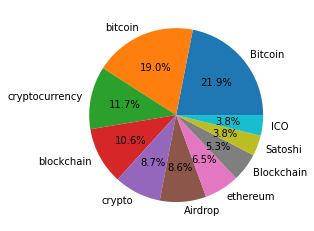

In [64]:
# display classes count
import matplotlib.pyplot as plt
import numpy as np

values = top_ten_hash_count
mylabels = top_ten_hash_tags

plt.pie(values, labels = mylabels, autopct='%1.1f%%')
# plt.legend()
plt.show() 

## Tweet Source Analysis

In [65]:
tweets_link_col = df['Link']
source_dics = {}

for tweets_link in tweets_link_col:
    start = tweets_link.find(">") + len(">")
#     end = tweets_link.find("<")
    source = tweets_link[start:-4]
    source_dics[source] = source_dics[source] + 1 if source in source_dics else 1

In [66]:
sorted_source_dict =  dict(sorted(source_dics.items(), key=lambda item: item[1], reverse=True)[:10])
top_ten_source_keys = list(sorted_source_dict.keys())
top_ten_source_count = list(sorted_source_dict.values())

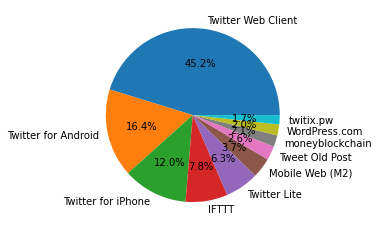

In [67]:
# display classes count
import matplotlib.pyplot as plt
import numpy as np

values = top_ten_source_count 
mylabels = top_ten_source_keys

plt.pie(values, labels = mylabels, autopct='%1.1f%%')
# plt.legend()
plt.show() 

## Tweet Most Frequent Words Analysis

In [68]:
tweets_link_col = df['Tweet']

In [69]:
dftaxes = df

In [70]:
!pip install nltk

In [71]:
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [72]:
import nltk

nltk.download('stopwords')
nltk.download('wordnet')
# nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /home/icrl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/icrl/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

/home/icrl/anaconda3/envs/abdul-tf2x/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/home/icrl/anaconda3/envs/abdul-tf2x/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


<AxesSubplot:>

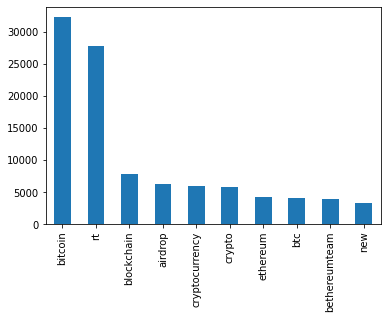

In [73]:
dftaxes = df
dftaxes['Text_Data'] = dftaxes['Tweet'].apply(
    lambda x: " ".join(x.lower() for x in x.split()))  # lower case conversion
dftaxes['Text_Data'] = dftaxes['Text_Data'].str.replace('[^\w\s]', '')  # getting rid of special characters
dftaxes['Text_Data'] = dftaxes['Text_Data'].str.replace('\d+',
                                                        '')  # removing numeric values from between the words
dftaxes['Text_Data'] = dftaxes['Text_Data'].apply(
    lambda x: x.translate(string.digits))  # removing numerical numbers
stop = stopwords.words('english')
dftaxes['Text_Data'] = dftaxes['Text_Data'].apply(
    lambda x: " ".join(x for x in x.split() if x not in stop))  # removing stop words
stemmer = WordNetLemmatizer()
dftaxes['Text_Data'] = [stemmer.lemmatize(word) for word in
                        dftaxes['Text_Data']]  # converting words to their dictionary form
dftaxes['Text_Data'] = dftaxes['Text_Data'].str.replace('shall', '')

taxfreq = pd.Series(' '.join(dftaxes['Text_Data']).split()).value_counts()[:10]
taxfreq.plot(kind='bar')

In [74]:
taxfreq = pd.Series(' '.join(dftaxes['Text_Data']).split()).value_counts()[:11]
del taxfreq['rt']
# del r[key]
taxfreq

bitcoin           32224
blockchain         7788
airdrop            6267
cryptocurrency     5959
crypto             5803
ethereum           4223
btc                4079
bethereumteam      3967
new                3255
price              2782
dtype: int64

In [75]:
df1 = pd.DataFrame(list(taxfreq.items()), columns=['words', 'counts'])
df1

,words,counts
0,bitcoin,32224
1,blockchain,7788
2,airdrop,6267
3,cryptocurrency,5959
4,crypto,5803
5,ethereum,4223
6,btc,4079
7,bethereumteam,3967
8,new,3255
9,price,2782


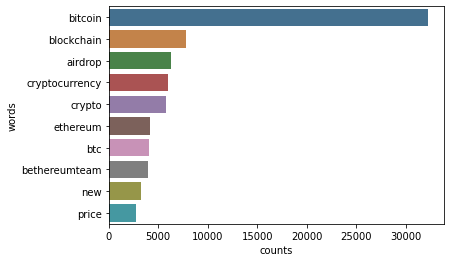

In [76]:
import seaborn as sns
ax = sns.barplot(y="words", x="counts", data=df1, saturation=.5,
                 )

<AxesSubplot:>

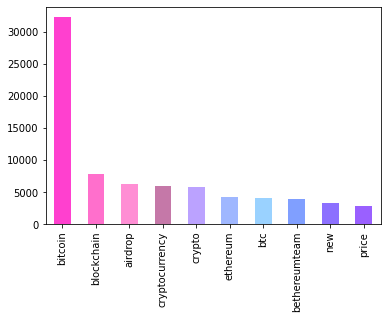

In [77]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
colors = ['#FF40CF', '#FF6FCC', '#FF8ED4', '#c578a8', '#BBA2FF',
          '#9FB7FF', '#9AD2FF', '#809FFF', '#8C70FF', '#9A60FF']

taxfreq.plot.bar(color= colors)

## Extract  number of classes aand their count

In [78]:
classes = list(df.Sentiment.unique())
possible_labels = df.Sentiment.unique()
print("\nNummber of classes in dataset: {}".format(len(classes)))
print("==============================={}".format(count_digit(len(classes))*'='))
print("\nName of the classes")
print("===================\n")
print(classes,"\n")


Nummber of classes in dataset: 3

Name of the classes

['neutral', 'positive', 'negative'] 



In [79]:
classes_counts = df.Sentiment.value_counts()
print("\nclasses counts")
print("==============\n")
print(classes_counts)


classes counts

positive    22937
neutral     21932
negative     5983
Name: Sentiment, dtype: int64


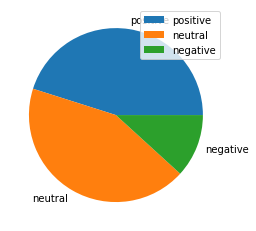

In [80]:
# display classes count
import matplotlib.pyplot as plt
import numpy as np

values = np.array(classes_counts)
mylabels = list(classes_counts.index)

plt.pie(values, labels = mylabels)
plt.legend()
plt.show() 

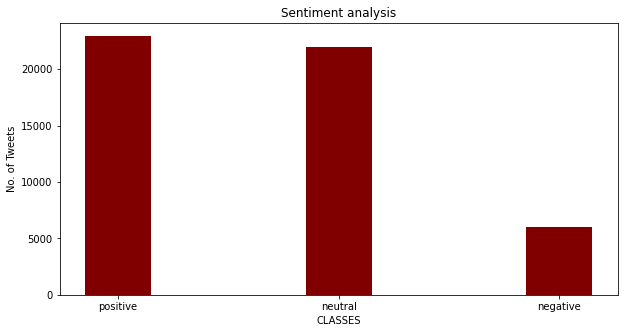

In [81]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(mylabels, values, color ='maroon', width=0.3)
 
plt.xlabel("CLASSES")
plt.ylabel("No. of Tweets")
plt.title("Sentiment analysis")
plt.show()